In [1]:
%pylab inline
from BB2tile import *

Populating the interactive namespace from numpy and matplotlib


Annotator regions are simply areas of all tiles of that object

##### Exhaustive and Local search takes a long time (2+hr unfinished)

# Timing test: 

In [2]:
# timing = np.loadtxt("timing.txt",delimiter=',')

In [3]:
timing = np.array([[10,10,0.0338950157166,464.38081193,7.91861891747],
                    [10,30,0.00309896469116,1512.11354518,7.85727095604],
                    [10,50,0.00107002258301,2473.26802087,13.1535961628],
                    [10,70,0.0114209651947,8468.36394405,14.3515789509]])

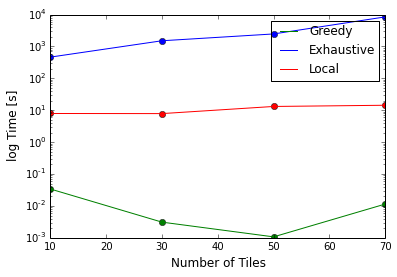

In [4]:
Nregions =  timing[:,1]
Tgreedy = timing[:,2]
Texhaust = timing[:,3]
Tlocal = timing[:,4]

plt.semilogy(Nregions,Tgreedy,'o',color="green")
plt.semilogy(Nregions,Texhaust,'o',color="blue")
plt.semilogy(Nregions,Tlocal,'o',color="red")
plt.semilogy(Nregions,Tgreedy,color="green",label = "Greedy")
plt.semilogy(Nregions,Texhaust,color="blue",label = "Exhaustive")
plt.semilogy(Nregions,Tlocal,color="red",label = "Local")
plt.legend()
plt.ylabel("log Time [s]",fontsize=12)
plt.xlabel("Number of Tiles",fontsize=12)

We are ignoring exhaustive in our analysis because it just takes too long, more of a baseline. 

In [5]:
img_info,object_tbl,bb_info,hit_info = load_info()
obj_lst = list(set(object_tbl.object_id))

In [6]:
my_BBG  = pd.read_csv("../my_ground_truth.csv")

In [45]:
object_id = 18
ground_truth_match = my_BBG[my_BBG.object_id==object_id]
BBG =  Polygon(zip(*process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])))

In [46]:
T_true =BBG.area

In [47]:
T_true

36206.5

In [ ]:
tiles, objIndicatorMat = createObjIndicatorMatrix(object_id)
Ta, La, solutionLista = experiment_avg(objIndicatorMat)
Tm, Lm, solutionListm = experiment_median(objIndicatorMat)

Starting Average Experiment with T value 18.5341463415
--------------------------
Starting Median Experiment with T value 0.0
--------------------------


In [ ]:
Tl, Ll, solutionListl = experiment_local(5000, objIndicatorMat)

In [22]:
from shapely.ops import cascaded_union

In [33]:
def join_tiles(solutionList,tiles):
    return cascaded_union([Polygon(tiles[tidx]) for tidx in solutionList])

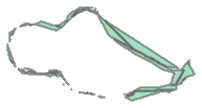

In [35]:
join_tiles(solutionLista,tiles)

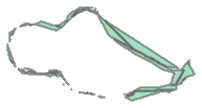

In [39]:
join_tiles(solutionListm,tiles)